data: [GOOGLE Stock Financial News: 2000–Today](https://www.kaggle.com/datasets/emrekaany/google-googl-financial-news-from-2000-to-today/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc

In [2]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
data_path = '/hdd/data/adp_data/Google_Daily_News.csv'

df = pd.read_csv(data_path, index_col = 'id')
df['datetime'] = pd.to_datetime(df['datetime'], unit = 's')
df.head()

,category,datetime,headline,image,related,source,summary,url
id,,,,,,,,
134059226,company,2025-04-23 23:00:00,"Alphabet earnings, Fed comments, Nintendo Swit...",https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Here's what investors are watching on Thursday...,https://finnhub.io/api/news?id=5381fda0f641074...
134059227,company,2025-04-23 22:08:15,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 10 Best Stocks...,https://finnhub.io/api/news?id=bdc5b5103ae73db...
134059228,company,2025-04-23 21:05:55,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 20 Best Stocks...,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...
134059229,company,2025-04-23 20:32:08,Google earnings are coming today. Here's what ...,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,https://finnhub.io/api/news?id=ed468a233b607bd...
134059230,company,2025-04-23 20:16:12,Equity Markets Close Higher Over Potential Red...,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,US benchmark equity indexes closed higher on W...,https://finnhub.io/api/news?id=54bdad840d13d87...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 134059226 to 133945001
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  231 non-null    object        
 1   datetime  231 non-null    datetime64[ns]
 2   headline  231 non-null    object        
 3   image     158 non-null    object        
 4   related   231 non-null    object        
 5   source    231 non-null    object        
 6   summary   190 non-null    object        
 7   url       231 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 16.2+ KB


In [5]:
df.describe(include = 'object')

,category,headline,image,related,source,summary,url
count,231,231,158,231,231,190,231
unique,1,231,4,1,5,188,231
top,company,"Alphabet earnings, Fed comments, Nintendo Swit...",https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Investors prepared for another week of develop...,https://finnhub.io/api/news?id=5381fda0f641074...
freq,231,1,155,231,155,3,1


In [6]:
df = df.drop(columns = ['category', 'image', 'related'])
df.head()

,datetime,headline,source,summary,url
id,,,,,
134059226,2025-04-23 23:00:00,"Alphabet earnings, Fed comments, Nintendo Swit...",Yahoo,Here's what investors are watching on Thursday...,https://finnhub.io/api/news?id=5381fda0f641074...
134059227,2025-04-23 22:08:15,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,Yahoo,We recently published a list of 10 Best Stocks...,https://finnhub.io/api/news?id=bdc5b5103ae73db...
134059228,2025-04-23 21:05:55,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,Yahoo,We recently published a list of 20 Best Stocks...,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...
134059229,2025-04-23 20:32:08,Google earnings are coming today. Here's what ...,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,https://finnhub.io/api/news?id=ed468a233b607bd...
134059230,2025-04-23 20:16:12,Equity Markets Close Higher Over Potential Red...,Yahoo,US benchmark equity indexes closed higher on W...,https://finnhub.io/api/news?id=54bdad840d13d87...


In [7]:
df.describe()

,datetime
count,231
mean,2025-04-20 18:09:27.012986880
min,2025-04-16 15:21:00
25%,2025-04-18 10:00:20
50%,2025-04-21 13:30:40
75%,2025-04-22 17:32:06.500000
max,2025-04-23 23:00:00


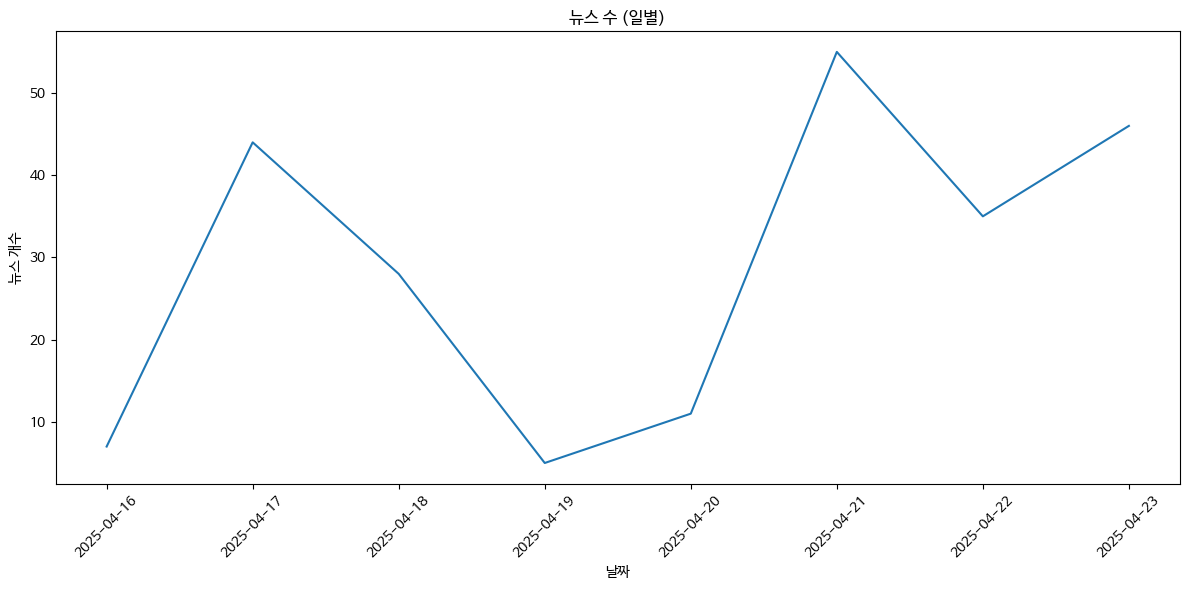

In [9]:
news_count_by_date = df['datetime'].dt.date.value_counts().sort_index()

plt.figure(figsize = (12, 6))
plt.plot(news_count_by_date.index, news_count_by_date.values)
plt.title('뉴스 수 (일별)')
plt.xlabel('날짜')
plt.ylabel('뉴스 개수')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

2000년대부터 오늘날까지 데이터래서 다운받았는데 실제론 며칠 되지 않는 데이터여서 분석을 더 진행하지 않음.